## **Medical Insuarance Data Set**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Data=pd.read_csv("C:/Users/user/OneDrive/Desktop/insurance.csv")

In [4]:
Data.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


In [5]:
Data.tail(1)

,age,sex,bmi,children,smoker,region,charges
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
Data.shape

(1338, 7)

In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
Data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
Data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [10]:
Data["sex"].unique()

array(['female', 'male'], dtype=object)

# **Let me check the missing value**

Data.isna().sum()

# **Lets Check the duplicate record**

In [12]:
Data.duplicated().sum()

np.int64(1)

**Let's remove the dupliacte column (removing the second one , by keeping the first one)**

In [13]:
Data.drop_duplicates(inplace=True)

In [14]:
Data.duplicated().sum()

np.int64(0)

# **Exploratory Data Analysis**

**Let's see the distribution of all the numerical columns**

In [15]:
numerical_cols=Data.columns[Data.dtypes!='object']
numerical_cols

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

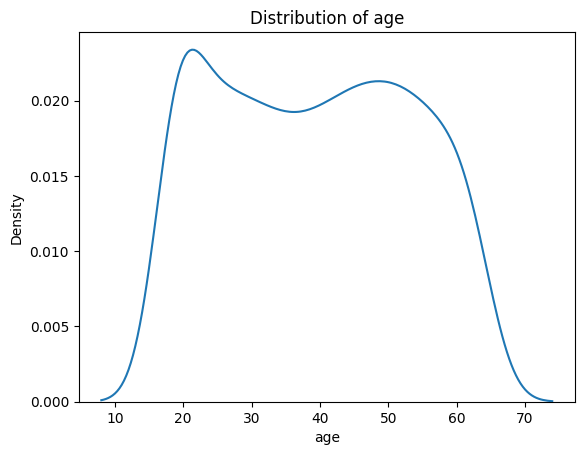

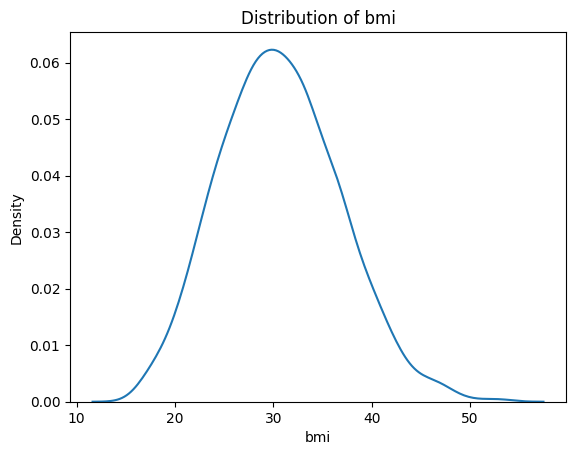

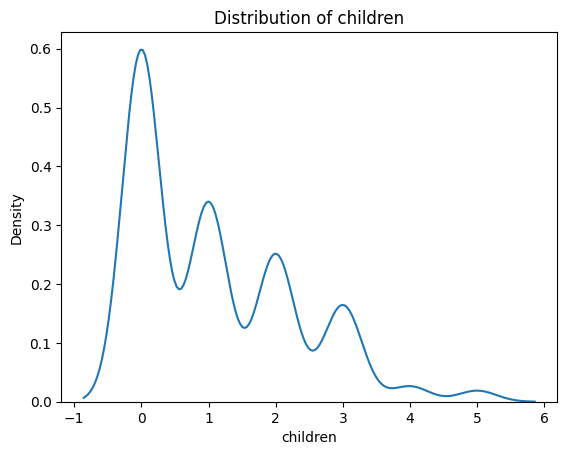

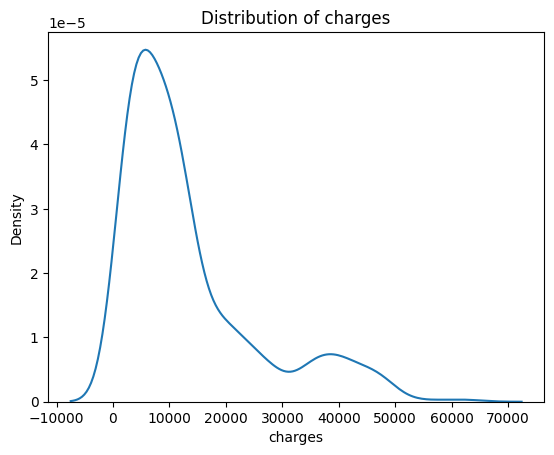

In [16]:
for col in numerical_cols:
    plt.figure()
    sns.kdeplot(data=Data,x=col)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()

In [18]:
print("Min of age :",Data['age'].min())

print("Max of age :",Data['age'].max())

Min of age : 18
Max of age : 64


In [19]:
print("Average age of the applicants :",Data['age'].mean())


Average age of the applicants : 39.222139117427076


<Axes: >

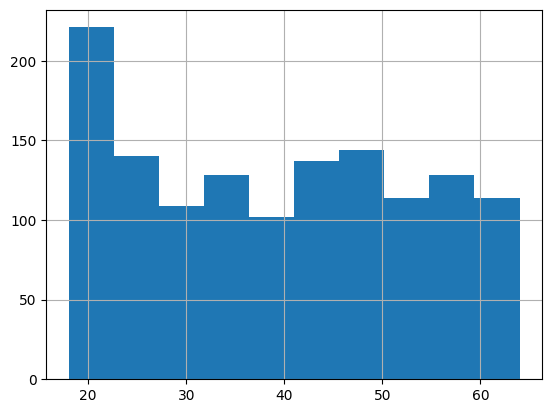

In [20]:
Data['age'].hist()

**We can see that most number of the applicants belong to the 18-22 age bucket.**

**Let's check for outliers in the age column**

<Axes: xlabel='age'>

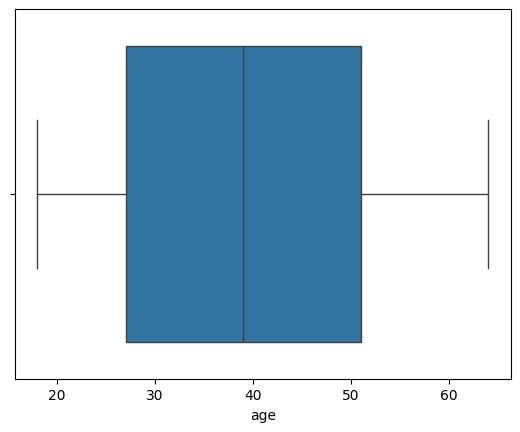

In [21]:
sns.boxplot(data=Data,x='age')

**No outliers in age column**

**Let's check for relation between age and charges column**

<Axes: xlabel='age', ylabel='charges'>

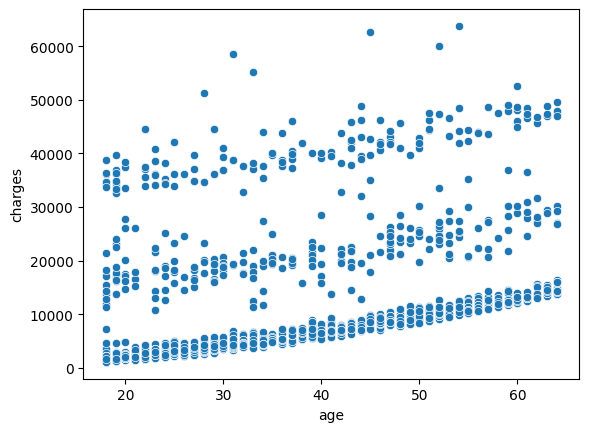

In [22]:
sns.scatterplot(data=Data,x='age',y='charges')

In [23]:
Data['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

**Lets see gender wise distribution of smokers and non smokers**

<Axes: xlabel='sex', ylabel='count'>

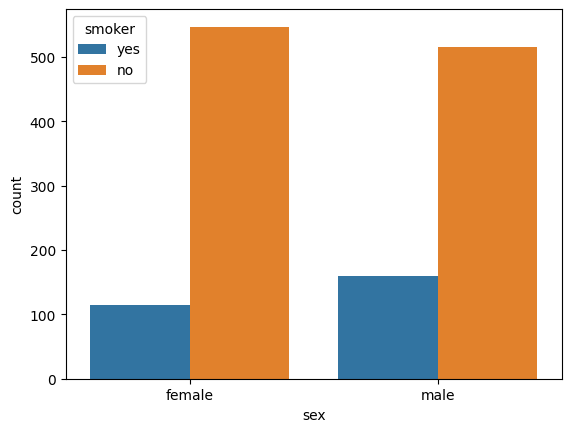

In [26]:
sns.countplot(data=Data,x='sex',hue='smoker')

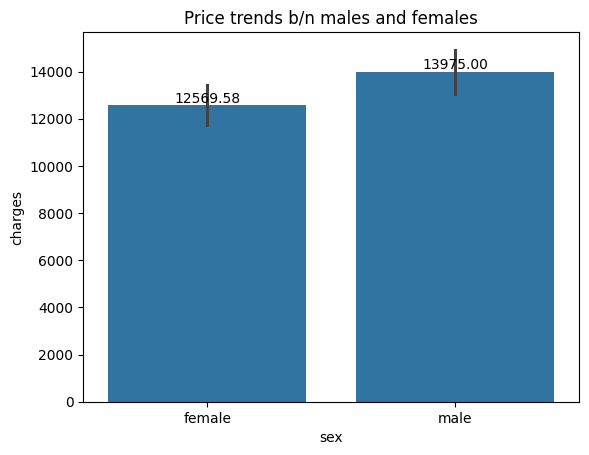

In [27]:
ax=sns.barplot(data=Data,x='sex',y='charges')
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f')
plt.title("Price trends b/n males and females")
plt.show()

**Let's explore the bmi column**

In [28]:
Data['bmi'].describe()

count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64

<Axes: xlabel='bmi'>

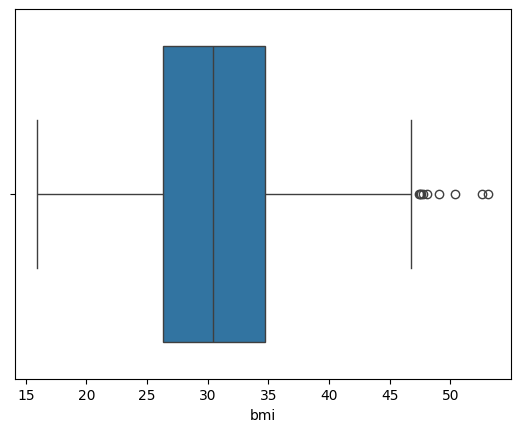

In [29]:
sns.boxplot(data=Data,x='bmi')

**We can see that there are few outliers in the bmi column**

<Axes: xlabel='bmi', ylabel='charges'>

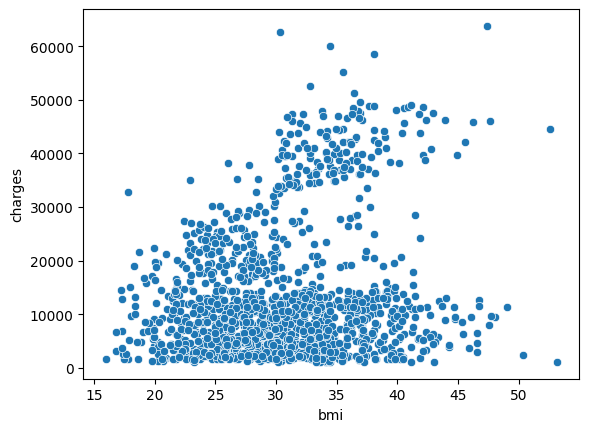

In [33]:
sns.scatterplot(data=Data,x='bmi',y='charges')

**Lets explore the region column**

In [34]:
Data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [35]:
Data['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

**Lets see the region wise distribution of smokers and non smokers**

<Axes: xlabel='region', ylabel='count'>

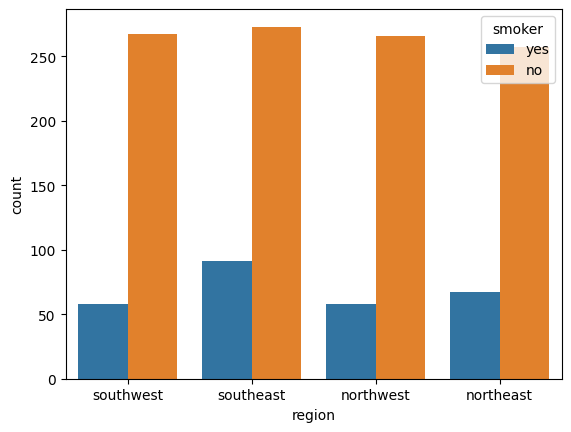

In [36]:
sns.countplot(data=Data,x='region',hue='smoker')

In [37]:
Data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [38]:
Data['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

**Let's plot a pie chart to see the percentage of smokers vs non-smokers**

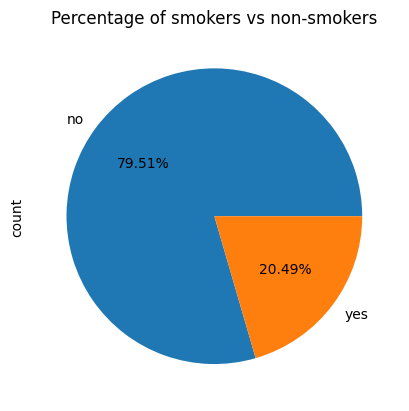

In [39]:
Data['smoker'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title("Percentage of smokers vs non-smokers")
plt.show()

**Lets see average age, BMI of applicants who are smokers**

In [40]:
print("Avg age :",Data[Data['smoker']=='yes']['age'].mean())

Avg age : 38.51459854014598


In [41]:
print("Avg BMI :",Data[Data['smoker']=='yes']['bmi'].mean())

Avg BMI : 30.70844890510949


**Let's see if there's any relation btw number of children and smoking habit of applicants**

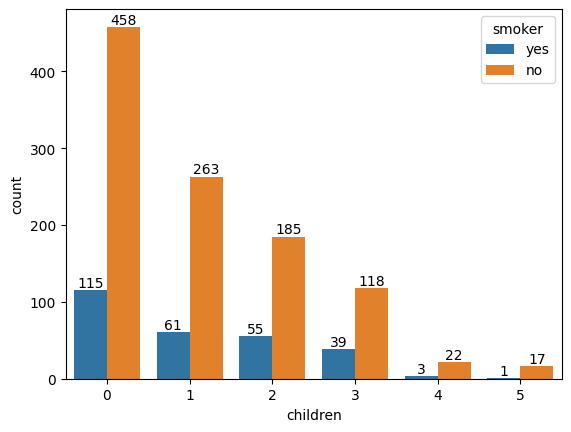

In [42]:
ax=sns.countplot(data=Data,x='children',hue='smoker')
for container in ax.containers:
    ax.bar_label(container)

**We can see that most of the applicants who smoke are the ones who have no children**

**Lets see price trends btw smokers nonsmokers**

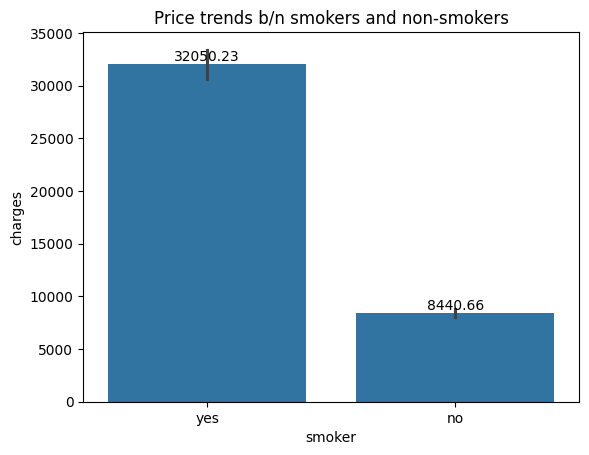

In [47]:
ax=sns.barplot(data=Data,y='charges',x='smoker')
for container in ax.containers:
    ax.bar_label(container,fmt='%.2f')
plt.title("Price trends b/n smokers and non-smokers")
plt.show()

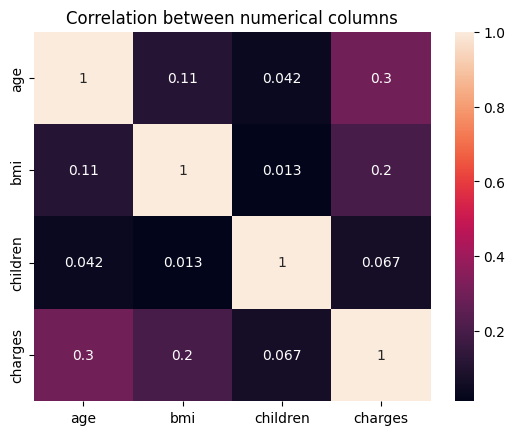

In [48]:
sns.heatmap(Data.corr(numeric_only=True),annot=True)
plt.title("Correlation between numerical columns")
plt.show()